In [1]:
import numpy as np 
import pandas as pd 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/assistments-realdataset/anonymized_full_release_competition_dataset.csv
/kaggle/input/metadata-assistments-dataset/ASSISTments Data Mining Competition 2017_ data description - log data.pdf
/kaggle/input/metadata-assistments-dataset/ASSISTments Data Mining Competition 2017_ data description.xlsx


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
df_original = pd.read_csv("/kaggle/input/assistments-realdataset/anonymized_full_release_competition_dataset.csv")
df_original.shape

(942816, 82)

In [63]:
df_original.columns

Index(['studentId', 'MiddleSchoolId', 'InferredGender', 'SY ASSISTments Usage',
       'AveKnow', 'AveCarelessness', 'AveCorrect', 'NumActions', 'AveResBored',
       'AveResEngcon', 'AveResConf', 'AveResFrust', 'AveResOfftask',
       'AveResGaming', 'action_num', 'skill', 'problemId', 'problemType',
       'assignmentId', 'assistmentId', 'startTime', 'endTime', 'timeTaken',
       'correct', 'original', 'hint', 'hintCount', 'hintTotal', 'scaffold',
       'bottomHint', 'attemptCount', 'frIsHelpRequest', 'frPast5HelpRequest',
       'frPast8HelpRequest', 'stlHintUsed', 'past8BottomOut',
       'totalFrPercentPastWrong', 'totalFrPastWrongCount', 'frPast5WrongCount',
       'frPast8WrongCount', 'totalFrTimeOnSkill', 'timeSinceSkill',
       'frWorkingInSchool', 'totalFrAttempted', 'totalFrSkillOpportunities',
       'responseIsFillIn', 'responseIsChosen', 'endsWithScaffolding',
       'endsWithAutoScaffolding', 'frTimeTakenOnScaffolding',
       'frTotalSkillOpportunitiesScaffolding',
 

In [64]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

In [65]:
meta_data = pd.read_excel("/kaggle/input/metadata-assistments-dataset/ASSISTments Data Mining Competition 2017_ data description.xlsx")

In [66]:
meta_data

,Unnamed: 0,Column name,example,description
0,1.0,ITEST_id,8,a deidentified ID/tag used for identifying an individual student
1,2.0,SY ASSISTments Usage,2004-2005,the academic years the student used ASSISTments
2,3.0,AveKnow,0.352416,"average student knowledge level (according to Bayesian Knowledge Tracing algorithm -- cf. Corbett & Anderson, 1995)"
3,4.0,AveCarelessness,0.183276,"average student carelessness (according to San Pedro, Baker, & Rodrigo, 2011 model)"
4,5.0,AveCorrect,0.483902,average student correctness
5,6.0,NumActions,1056,total number of student actions in system
6,7.0,AveResBored,0.208389,"average student affect: boredom (see Pardos, Baker, San Pedro, Gowda, & Gowda, 2014)"
7,8.0,AveResEngcon,0.679126,"average student affect:engaged concentration (see Pardos, Baker, San Pedro, Gowda, & Gowda, 2014)"
8,9.0,AveResConf,0.115905,"average student affect:confusion (see Pardos, Baker, San Pedro, Gowda, & Gowda, 2014)"
9,10.0,AveResFrust,0.112408,"average student affect:frustration (see Pardos, Baker, San Pedro, Gowda, & Gowda, 2014)"


# Data Cleaning

In [67]:
df_original.isnull().any()


studentId                                 False
MiddleSchoolId                            False
InferredGender                             True
SY ASSISTments Usage                      False
AveKnow                                   False
AveCarelessness                           False
AveCorrect                                False
NumActions                                False
AveResBored                               False
AveResEngcon                              False
AveResConf                                False
AveResFrust                               False
AveResOfftask                             False
AveResGaming                              False
action_num                                False
skill                                     False
problemId                                 False
problemType                               False
assignmentId                              False
assistmentId                              False
startTime                               

In [68]:
missing_columns = df_original.columns[df_original.isnull().any()]
print(missing_columns)


Index(['InferredGender', 'sumTime3SDWhen3RowRight', 'isSTEM'], dtype='object')


In [69]:
print(df_original.dtypes)

studentId                                   int64
MiddleSchoolId                              int64
InferredGender                             object
SY ASSISTments Usage                       object
AveKnow                                   float64
AveCarelessness                           float64
AveCorrect                                float64
NumActions                                  int64
AveResBored                               float64
AveResEngcon                              float64
AveResConf                                float64
AveResFrust                               float64
AveResOfftask                             float64
AveResGaming                              float64
action_num                                  int64
skill                                      object
problemId                                   int64
problemType                                object
assignmentId                                int64
assistmentId                                int64


In [70]:
# Drop those columns
df = df_original.drop(columns=missing_columns)

In [71]:
df.shape

(942816, 79)

In [72]:
# SAFE: This removes true, complete duplicates
df.drop_duplicates(inplace=True)


In [73]:
df["timeTaken"].describe()

count    942816.000000
mean         29.747869
std          72.019768
min           0.000000
25%           5.000000
50%          11.000000
75%          30.000000
max        9999.000000
Name: timeTaken, dtype: float64

In [74]:
# Check for NaNs
nans = df["timeTaken"].isna().sum()
print("NaN count:", nans)


NaN count: 0


In [75]:
print(df["timeTaken"].unique()[:50])  # show first 50 unique values


[49.          3.99999976  6.00000024 17.99999976  1.99999976 59.
 15.00000024 61.          0.         14.          8.         28.00000024
 51.         29.          4.00000024 83.         50.99999976  8.99999976
 21.00000048 14.99999976 36.00000024 12.00000024 16.          2.99999952
  2.00000048  8.99999952 41.00000024  7.00000048 20.99999976 11.99999976
  3.         18.00000048 74.00000024 11.          5.          1.00000024
 19.         17.00000024 79.99999976 22.00000024 22.99999976 44.
 35.99999976 24.00000048 38.99999976 32.         21.99999952 13.00000048
 27.99999952  3.00000024]


In [76]:
print(df["timeTaken"].sort_values().head(10))   # smallest 10
print(df["timeTaken"].sort_values(ascending=False).head(10))   # largest 10


50362     0.0
377325    0.0
413683    0.0
37738     0.0
88362     0.0
740150    0.0
915293    0.0
88314     0.0
563840    0.0
740155    0.0
Name: timeTaken, dtype: float64
866870    9999.0
939171    9999.0
600295    9999.0
196576    9999.0
731180    9999.0
814419    9999.0
624809    9999.0
788196    9999.0
720951    9999.0
796909    3925.0
Name: timeTaken, dtype: float64


In [77]:
count_9999 = (df["timeTaken"] == 9999).sum()
print("Number of 9999 values:", count_9999)


Number of 9999 values: 9


In [78]:
count_99 = (df["timeTaken"] == 99).sum()
print("Number of 99 values:", count_99)

Number of 99 values: 359


In [79]:
count_9 = (df["timeTaken"] == 9).sum()
print("Number of 9 values:", count_9)

Number of 9 values: 1181


9999 seconds which is 2 hours, 46 minutes, and 39 seconds. These extreme durations are not considered representative of a student's active problem-solving time and likely reflect periods of inactivity or external distractions. So dropping those columns.

In [80]:
# Remove rows where timeTaken == 9999
df = df[df["timeTaken"] != 9999]

print("After removal, shape:", df.shape)


After removal, shape: (942807, 79)


In [81]:
count_0 = (df["timeTaken"] == 0).sum()
print("Number of 0 values:", count_0)

Number of 0 values: 5393


0 may represent useful student behavior. So treating it  as valid data → "instant responses".

In [82]:
df.columns

Index(['studentId', 'MiddleSchoolId', 'SY ASSISTments Usage', 'AveKnow',
       'AveCarelessness', 'AveCorrect', 'NumActions', 'AveResBored',
       'AveResEngcon', 'AveResConf', 'AveResFrust', 'AveResOfftask',
       'AveResGaming', 'action_num', 'skill', 'problemId', 'problemType',
       'assignmentId', 'assistmentId', 'startTime', 'endTime', 'timeTaken',
       'correct', 'original', 'hint', 'hintCount', 'hintTotal', 'scaffold',
       'bottomHint', 'attemptCount', 'frIsHelpRequest', 'frPast5HelpRequest',
       'frPast8HelpRequest', 'stlHintUsed', 'past8BottomOut',
       'totalFrPercentPastWrong', 'totalFrPastWrongCount', 'frPast5WrongCount',
       'frPast8WrongCount', 'totalFrTimeOnSkill', 'timeSinceSkill',
       'frWorkingInSchool', 'totalFrAttempted', 'totalFrSkillOpportunities',
       'responseIsFillIn', 'responseIsChosen', 'endsWithScaffolding',
       'endsWithAutoScaffolding', 'frTimeTakenOnScaffolding',
       'frTotalSkillOpportunitiesScaffolding',
       'totalFrSkil

In [83]:
df['skill'].unique()

array(['properties-of-geometric-figures',
       'sum-of-interior-angles-more-than-3-sides', 'point-plotting',
       'transformations-rotations', 'reading-graph', 'area', 'perimeter',
       'square-root', 'isosceles-triangle',
       'application: isosceles triangle', 'multiplying-decimals',
       'proportion', 'pythagorean-theorem',
       'interpreting-linear-equations', 'pattern-finding',
       'application: compare points',
       'application: multi-column subtraction',
       'application: simple multiplication',
       'application: compare expressions',
       'application: order of operations',
       'application: multi-column addition', 'noskill',
       'application: read points', 'application: find slope in graph',
       'p-patterns-relations-algebra', 'percent-of', 'venn-diagram',
       'equivalent-fractions-decimals-percents', 'of-means-multiply',
       'fraction-multiplication', 'supplementary-angles', 'transversals',
       'triangle-inequality', 'multiplication

In [84]:
df['skill'].nunique()

102

These are the broad classification of skill set:

1️⃣ Geometry & Measurement 2D & 3D Shapes & Properties: properties-of-geometric-figures, isosceles-triangle, application: isosceles triangle, supplementary-angles, transversals, triangle-inequality, congruence, similar-triangles, properties-of-solids

Angles & Theorems: sum-of-interior-angles-more-than-3-sides, sum-of-interior-angles-triangle, pythagorean-theorem, meaning-of-pi

Transformations & Graphs: transformations-rotations, point-plotting, reading-graph, application: read points, application: compare points, application: find slope in graph, graph interpretation, graph-shape, interpreting-linear-equations, slope, interpreting-numberline, number-line

Area, Perimeter, Volume: area, perimeter, area-concept, area-of-circle, surface-area-and-volume, linear-area-volume-conversion, circumference, measurement, m-measurement, rate-with-distance-and-time

2️⃣ Algebra & Equations Expressions & Equations: making-sense-of-expressions-and-equations, algebraic-manipulation, substitution, equation-solving, equation-concept, order-of-operations, application: order of operations, application: compare expressions, application: simple multiplication, application: multi-column subtraction, application: multi-column addition, application: finding percentage of a number, algebra symbolization, symbolization-articulation

Functions & Patterns: inducing-functions, evaluating-functions, p-patterns-relations-algebra, pattern-finding

Inequalities: inequalities, inequality-solving

3️⃣ Numbers & Operations Whole Numbers & Decimals: addition, subtraction, multiplication, division, simple-calculation, adding-decimals, subtracting-decimals, multiplying-decimals, divide-decimals, multiplying-positive-negative-numbers, square-root, exponents, reciprocal, scientific-notation, rounding

Fractions & Percents: fractions, fraction-multiplication, fraction-division, comparing-fractions, equivalent-fractions-decimals-percents, fraction-decimals-percents, reduce-fraction, finding-percents, percent-of, of-means-multiply, discount, percents

Number Sense: n-number-sense-operations, ordering-numbers, integers, divisibility, prime-number, least-common-multiple

4️⃣ Data Handling, Probability & Statistics Probability & Combinatorics: probability, combinatorics, venn-diagram

Statistics & Graphs: mean, median, mode, statistics, circle-graph, stem-and-leaf-plot

5️⃣ Measurement Conversions & Rates unit-conversion, rate, rate-with-distance-and-time, linear-area-volume-conversion

6️⃣ Miscellaneous noskill (placeholder)

Some application-based ones could span multiple categories.

In [85]:
easy_skills = [
    # Numbers & Operations
    "addition",
    "subtraction",
    "multiplication",
    "division",
    "adding-decimals",
    "subtracting-decimals",
    "multiplying-decimals",
    "divide-decimals",
    "multiplying-positive-negative-numbers",
    "square-root",
    "exponents",
    "reciprocal",
    "ordering-numbers",
    "rounding",
    "prime-number",
    "least-common-multiple",
    "divisibility",
    "simple-calculation",

    # Fractions & Percents
    "fractions",
    "fraction-multiplication",
    "fraction-division",
    "comparing-fractions",
    "reduce-fraction",
    "equivalent-fractions-decimals-percents",
    "finding-percents",
    "percent-of",
    "of-means-multiply",
    "discount"
]


In [86]:
df['problemType'].unique()

array(['textfieldquestion', 'noprobtype', 'radioquestion', 'other',
       'algebra', 'popupmenuquestion', 'checkboxquestion',
       'interfaceradioquestion1', 'algebrafieldquestion',
       'interfacetextfieldquestion', '1', 'interfaceradioquestion',
       'algebrafieldquestion1', 'interfacepopupmenuquestion1',
       'interfacetextfieldquestion1', '0'], dtype=object)

In [87]:
df['problemType'].nunique()

16

In [88]:
problem_type_mapping = {
    'textfieldquestion': 'text_input',
    'interfacetextfieldquestion': 'text_input',
    'interfacetextfieldquestion1': 'text_input',
    'algebra': 'algebra_input',
    'algebrafieldquestion': 'algebra_input',
    'algebrafieldquestion1': 'algebra_input',
    'radioquestion': 'multiple_choice',
    'interfaceradioquestion': 'multiple_choice',
    'interfaceradioquestion1': 'multiple_choice',
    'checkboxquestion': 'checkbox',
    'popupmenuquestion': 'dropdown',
    'interfacepopupmenuquestion1': 'dropdown'
}

In [89]:
# Apply mapping to the 'problemType' column only
df['problemType'] = df['problemType'].map(problem_type_mapping)

# Optional: remove rows where mapping failed (NaN values)
df = df.dropna(subset=['problemType'])

In [90]:
easy_problem_types = [
'text_input',
'multiple_choice',
'checkbox',
'multiple_choice',
'text_input'
]

In [91]:
df['problemType'].nunique()

5

In [92]:
df.columns

Index(['studentId', 'MiddleSchoolId', 'SY ASSISTments Usage', 'AveKnow',
       'AveCarelessness', 'AveCorrect', 'NumActions', 'AveResBored',
       'AveResEngcon', 'AveResConf', 'AveResFrust', 'AveResOfftask',
       'AveResGaming', 'action_num', 'skill', 'problemId', 'problemType',
       'assignmentId', 'assistmentId', 'startTime', 'endTime', 'timeTaken',
       'correct', 'original', 'hint', 'hintCount', 'hintTotal', 'scaffold',
       'bottomHint', 'attemptCount', 'frIsHelpRequest', 'frPast5HelpRequest',
       'frPast8HelpRequest', 'stlHintUsed', 'past8BottomOut',
       'totalFrPercentPastWrong', 'totalFrPastWrongCount', 'frPast5WrongCount',
       'frPast8WrongCount', 'totalFrTimeOnSkill', 'timeSinceSkill',
       'frWorkingInSchool', 'totalFrAttempted', 'totalFrSkillOpportunities',
       'responseIsFillIn', 'responseIsChosen', 'endsWithScaffolding',
       'endsWithAutoScaffolding', 'frTimeTakenOnScaffolding',
       'frTotalSkillOpportunitiesScaffolding',
       'totalFrSkil

In [93]:
df.shape

(596702, 79)

In [94]:
filtered_df =  df[
   df['skill'].isin(easy_skills) &
    df['problemType'].isin(easy_problem_types)
]


In [95]:
filtered_df.shape

(106772, 79)

In [96]:
# Check distribution of suspicious values in timeTaken
count_999 = (filtered_df["timeTaken"] == 999).sum()
count_99   = (filtered_df["timeTaken"] == 99).sum()
count_9    = (filtered_df["timeTaken"] == 9).sum()
count_0    = (filtered_df["timeTaken"] == 0).sum()

print("Number of 999 values:", count_999)
print("Number of 99 values:", count_99)
print("Number of 9 values:", count_9)
print("Number of 0 values:", count_0)

# Quick summary stats
print("\nDescriptive stats for timeTaken:")
print(filtered_df["timeTaken"].describe())


Number of 999 values: 0
Number of 99 values: 34
Number of 9 values: 135
Number of 0 values: 847

Descriptive stats for timeTaken:
count    106772.000000
mean         29.454787
std          65.605689
min           0.000000
25%           4.000000
50%          11.000000
75%          30.000000
max        3925.000000
Name: timeTaken, dtype: float64


## Distribution

Median (50%) = 11 sec

75% quantile = 30 sec

Max = 3925 sec (~65 min)

Mean > median → some long-tail responses are skewing the average.

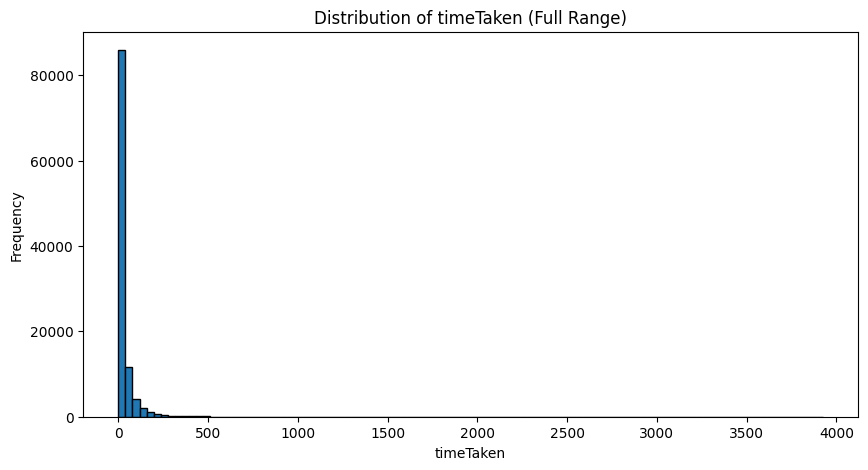

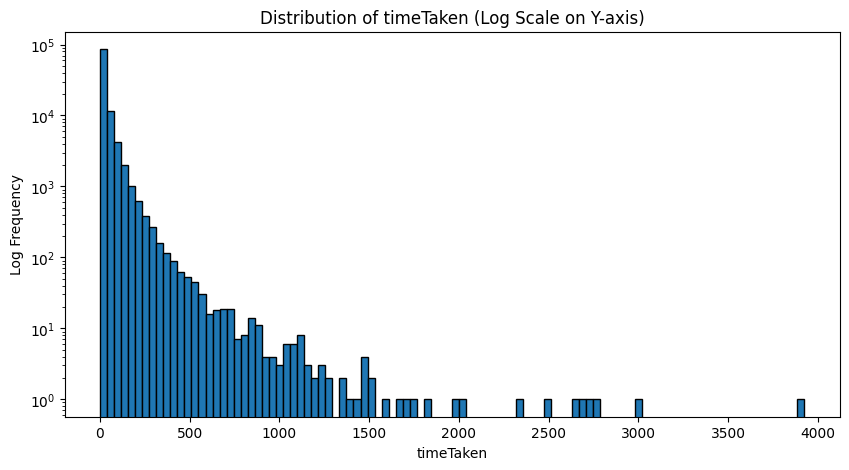

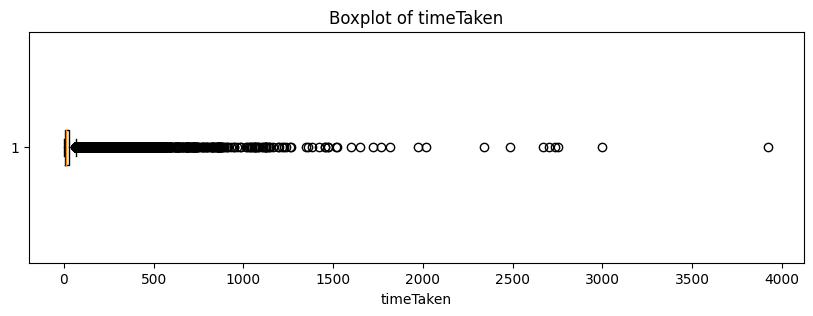

In [97]:
import matplotlib.pyplot as plt

# 1. Histogram (full range)
plt.figure(figsize=(10,5))
plt.hist(filtered_df["timeTaken"], bins=100, edgecolor="k")
plt.title("Distribution of timeTaken (Full Range)")
plt.xlabel("timeTaken")
plt.ylabel("Frequency")
plt.show()

# 2. Histogram (log scale for x-axis)
plt.figure(figsize=(10,5))
plt.hist(filtered_df["timeTaken"], bins=100, edgecolor="k", log=True)
plt.title("Distribution of timeTaken (Log Scale on Y-axis)")
plt.xlabel("timeTaken")
plt.ylabel("Log Frequency")
plt.show()

# 3. Boxplot
plt.figure(figsize=(10,3))
plt.boxplot(filtered_df["timeTaken"], vert=False)
plt.title("Boxplot of timeTaken")
plt.xlabel("timeTaken")
plt.show()


In [98]:
import pandas as pd

# Suppose your dataframe is filtered_df
# Compute 95th and 99th percentiles
p95 = filtered_df['timeTaken'].quantile(0.95)
p99 = filtered_df['timeTaken'].quantile(0.99)

# Cap values at 95th percentile
filtered_df['timeTaken_capped_95'] = filtered_df['timeTaken'].clip(upper=p95)

# Cap values at 99th percentile
filtered_df['timeTaken_capped_99'] = filtered_df['timeTaken'].clip(upper=p99)


In [99]:
filtered_df.shape

(106772, 81)

In [100]:
# Counts for specific values in the capped columns
for col in ['timeTaken_capped_95', 'timeTaken_capped_99']:
    print(f"\n--- Stats for {col} ---")
    count_999 = (filtered_df[col] == 999).sum()
    count_99  = (filtered_df[col] == 99).sum()
    count_9   = (filtered_df[col] == 9).sum()
    count_0   = (filtered_df[col] == 0).sum()

    print("Number of 999 values:", count_999)
    print("Number of 99 values:", count_99)
    print("Number of 9 values:", count_9)
    print("Number of 0 values:", count_0)

    # Descriptive stats
    print("\nDescriptive stats:")
    print(filtered_df[col].describe())



--- Stats for timeTaken_capped_95 ---
Number of 999 values: 0
Number of 99 values: 34
Number of 9 values: 135
Number of 0 values: 847

Descriptive stats:
count    106772.000000
mean         23.900646
std          30.121578
min           0.000000
25%           4.000000
50%          11.000000
75%          30.000000
max         113.000000
Name: timeTaken_capped_95, dtype: float64

--- Stats for timeTaken_capped_99 ---
Number of 999 values: 0
Number of 99 values: 34
Number of 9 values: 135
Number of 0 values: 847

Descriptive stats:
count    106772.000000
mean         27.444351
std          43.929595
min           0.000000
25%           4.000000
50%          11.000000
75%          30.000000
max         267.290000
Name: timeTaken_capped_99, dtype: float64


Key insights

Winsorization effect: Capping at 95th percentile reduces extreme high values more aggressively than 99th percentile.

Distribution impact: Both capping methods preserve the lower values (0, 9) while reducing the effect of extreme high values on mean and standard deviation.

Your counts: Since you still see 99 values in both capped columns, it means 99 was below both 95th and 99th percentiles, so it was not capped.

✅ This is exactly what Winsorization is intended to do: reduce the impact of extreme outliers while keeping all rows.

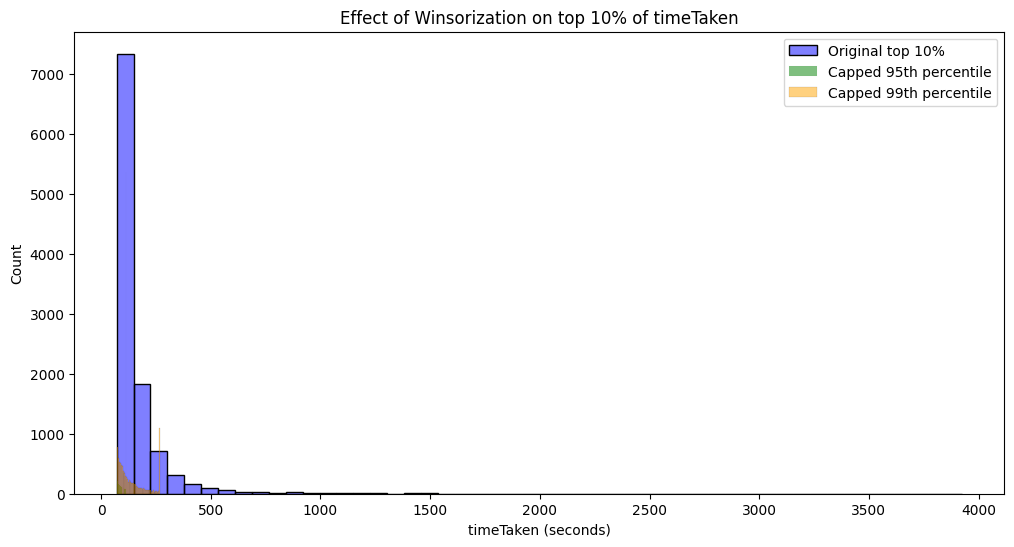

In [101]:
plt.figure(figsize=(12,6))

# Focus on top 10% values
sns.histplot(filtered_df[filtered_df['timeTaken'] > filtered_df['timeTaken'].quantile(0.90)]['timeTaken'], 
             bins=50, color='blue', alpha=0.5, label='Original top 10%')

sns.histplot(filtered_df[filtered_df['timeTaken_capped_95'] > filtered_df['timeTaken'].quantile(0.90)]['timeTaken_capped_95'], 
             bins=50, color='green', alpha=0.5, label='Capped 95th percentile')

sns.histplot(filtered_df[filtered_df['timeTaken_capped_99'] > filtered_df['timeTaken'].quantile(0.90)]['timeTaken_capped_99'], 
             bins=50, color='orange', alpha=0.5, label='Capped 99th percentile')

plt.xlabel('timeTaken (seconds)')
plt.ylabel('Count')
plt.title('Effect of Winsorization on top 10% of timeTaken')
plt.legend()
plt.show()


It's a great technique because, as you rightly pointed out, those extreme timeTaken values might not be errors. They could represent a student who took a long break, was "gaming the system," or was genuinely stuck and thinking for a long time. By capping them, you acknowledge that the time taken was "very long" without letting an extreme value (like 65 minutes) disproportionately influence the model's training.

In [102]:
filtered_df.columns

Index(['studentId', 'MiddleSchoolId', 'SY ASSISTments Usage', 'AveKnow',
       'AveCarelessness', 'AveCorrect', 'NumActions', 'AveResBored',
       'AveResEngcon', 'AveResConf', 'AveResFrust', 'AveResOfftask',
       'AveResGaming', 'action_num', 'skill', 'problemId', 'problemType',
       'assignmentId', 'assistmentId', 'startTime', 'endTime', 'timeTaken',
       'correct', 'original', 'hint', 'hintCount', 'hintTotal', 'scaffold',
       'bottomHint', 'attemptCount', 'frIsHelpRequest', 'frPast5HelpRequest',
       'frPast8HelpRequest', 'stlHintUsed', 'past8BottomOut',
       'totalFrPercentPastWrong', 'totalFrPastWrongCount', 'frPast5WrongCount',
       'frPast8WrongCount', 'totalFrTimeOnSkill', 'timeSinceSkill',
       'frWorkingInSchool', 'totalFrAttempted', 'totalFrSkillOpportunities',
       'responseIsFillIn', 'responseIsChosen', 'endsWithScaffolding',
       'endsWithAutoScaffolding', 'frTimeTakenOnScaffolding',
       'frTotalSkillOpportunitiesScaffolding',
       'totalFrSkil

# Analyzing the target columns

In [103]:
cols = ['confidence(BORED)', 'confidence(CONCENTRATING)', 'confidence(CONFUSED)',
        'confidence(FRUSTRATED)', 'confidence(OFF TASK)', 'confidence(GAMING)']

df[cols].describe()


,confidence(BORED),confidence(CONCENTRATING),confidence(CONFUSED),confidence(FRUSTRATED),confidence(OFF TASK),confidence(GAMING)
count,596702.000000,5.967020e+05,596702.000000,596702.000000,596702.000000,596702.000000
mean,0.441339,5.342012e-01,0.141833,0.148567,0.260571,0.331814
std,0.122626,1.845206e-01,0.296150,0.310335,0.217368,0.337025
min,0.355694,6.500000e-07,0.000000,0.000000,0.000000,0.000039
25%,0.355694,3.743169e-01,0.000000,0.000000,0.090909,0.047821
50%,0.355694,5.585994e-01,0.000000,0.000000,0.230769,0.186970
75%,0.597865,6.591692e-01,0.000000,0.091463,0.230769,0.610372
max,0.680982,1.000000e+00,1.000000,1.000000,1.000000,0.999676


##Analysis of the descriptive statistics for your target columns.

This summary reveals some very strong and interesting patterns about the model's predictions of student emotions.

Key Inferences
'Concentrating' is the Dominant Predicted State 🧠

confidence(CONCENTRATING) has the highest mean (0.54), indicating that, on average, this is the most likely emotional state predicted by the model.

The distribution is fairly balanced around the mean, suggesting it's a common and consistently identified state.

'Boredom' has a High and Constant Baseline 😑

This is perhaps the most striking finding. The min value for confidence(BORED) is 0.355. This means the model never predicts boredom with less than 35.5% confidence.

It also has the lowest standard deviation (std of 0.12), meaning the predictions for boredom are very consistent and don't vary much. It's a persistent, background prediction.

'Confused' and 'Frustrated' are Rare Events ❓😠

Both confidence(CONFUSED) and confidence(FRUSTRATED) have a median (50%) and 75th percentile of 0.0.

This is a crucial insight: it means that for over 75% of the data points, the model is highly certain that the student is NOT confused or frustrated.

The positive mean (0.13 and 0.16) is caused by the few instances where the confidence for these states is high. This tells you these are infrequently detected but sometimes very strong signals.

'Gaming' and 'Off Task' are Moderately Frequent

These states have moderate average confidences (mean of 0.34 and 0.26).

Their distributions show that while they can have very high confidence (max near 1.0), they are more often predicted with lower confidence (the 75th percentile is 0.61 for Gaming and only 0.23 for Off Task).

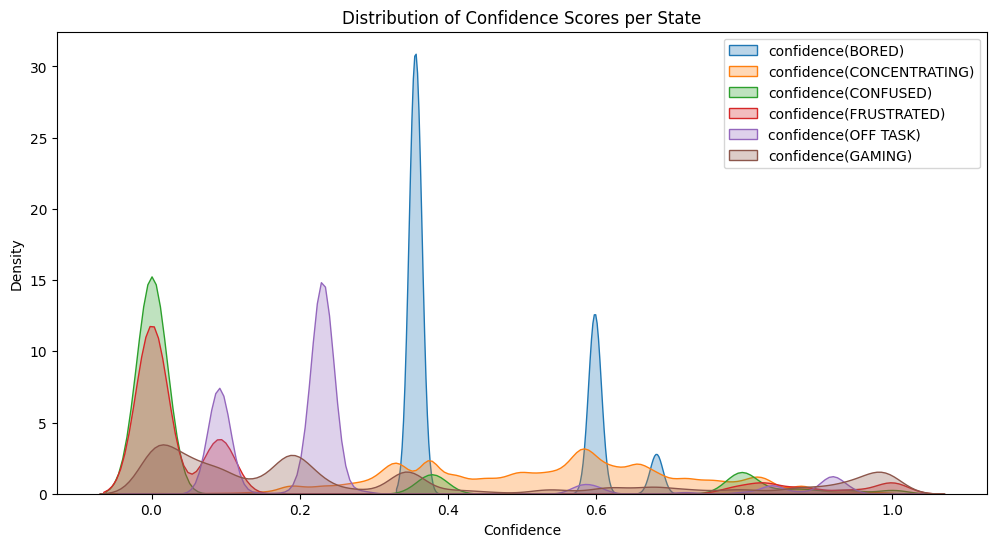

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
for col in cols:
    sns.kdeplot(df[col], label=col, fill=True, alpha=0.3)
plt.title("Distribution of Confidence Scores per State")
plt.xlabel("Confidence")
plt.ylabel("Density")
plt.legend()
plt.show()


👉 Inference:
Students are most frequently concentrating or gaming, while confused/off-task are less common

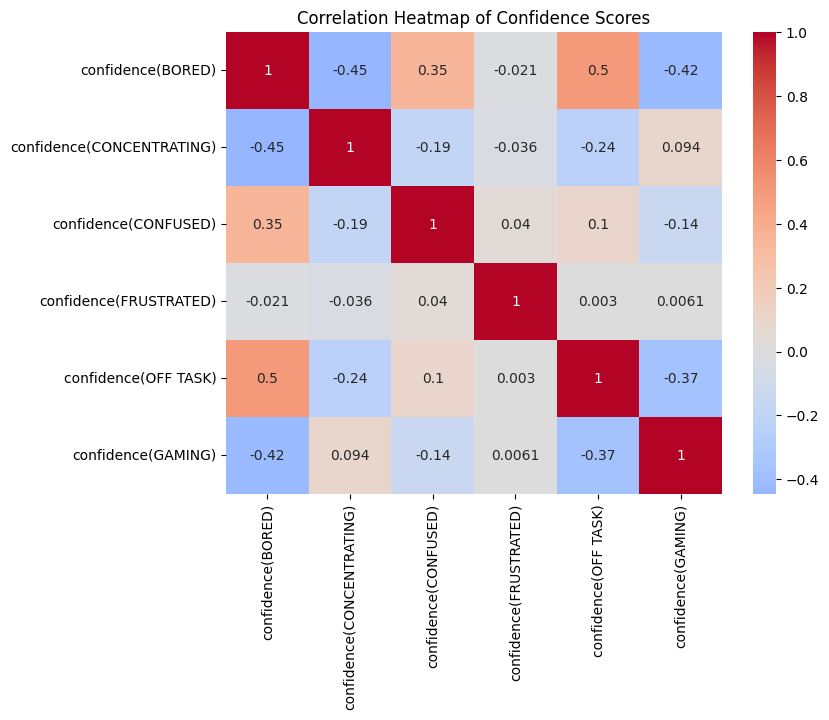

In [105]:
corr = df[cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Confidence Scores")
plt.show()

# how to infer:

# Insights:

# Negative correlation (e.g., CONCENTRATING vs BORED) means the model distinguishes these well.

# Positive correlation may show confusion (e.g., CONFUSED & FRUSTRATED).

In [106]:
#4. Dominant State Analysis

#Find the most likely state per record:

df['dominant_state'] = df[cols].idxmax(axis=1)
state_counts = df['dominant_state'].value_counts(normalize=True) * 100
state_counts

# 👉 This gives the % of time students were BORED, CONCENTRATING, etc.

dominant_state
confidence(CONCENTRATING)    32.839508
confidence(GAMING)           20.721566
confidence(BORED)            16.120107
confidence(FRUSTRATED)       11.958901
confidence(CONFUSED)          9.790314
confidence(OFF TASK)          8.569604
Name: proportion, dtype: float64

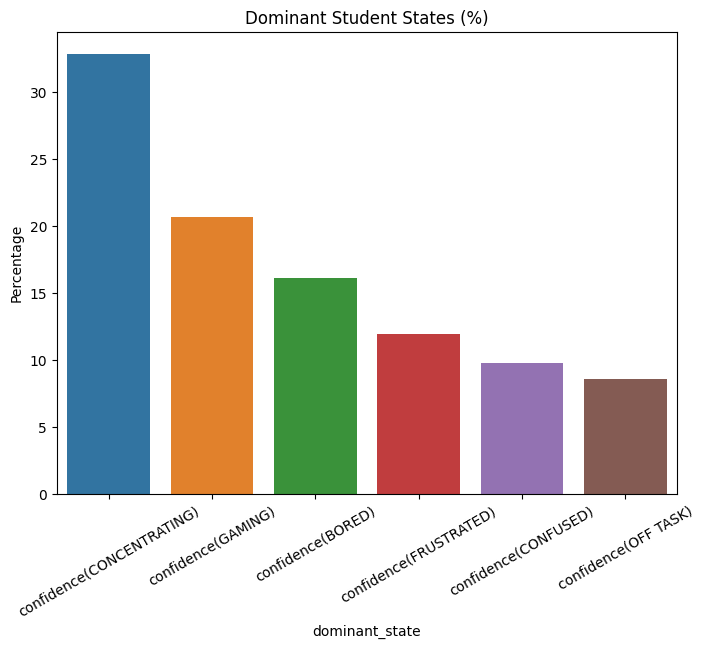

In [107]:
plt.figure(figsize=(8,6))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title("Dominant Student States (%)")
plt.ylabel("Percentage")
plt.xticks(rotation=30)
plt.show()


<Axes: xlabel='dominant_state', ylabel='correct'>

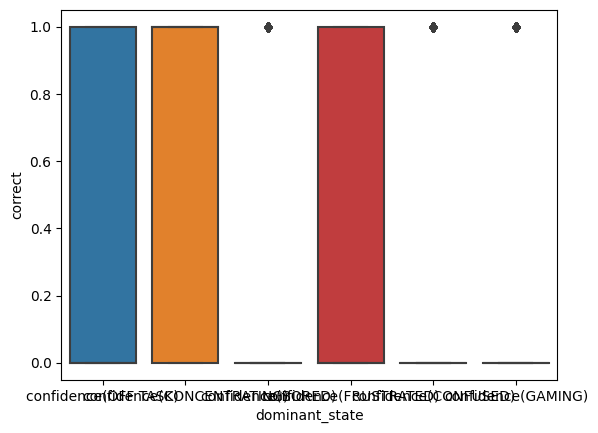

In [108]:
# 5. Link to Performance

# We can relate states to learning outcomes:

# (a) Correctness vs State

sns.boxplot(x="dominant_state", y="correct", data=df)


In [109]:
# (b) Time Taken vs State

<Axes: xlabel='dominant_state', ylabel='timeTaken'>

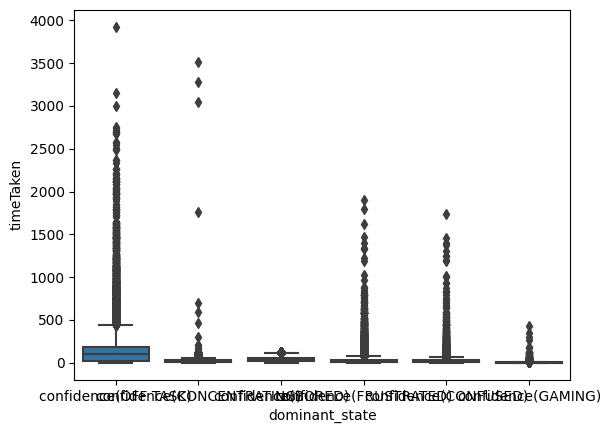

In [110]:
sns.boxplot(x="dominant_state", y="timeTaken", data=df)


# Feature Engineering

In [111]:
# 6. Advanced: Engagement Score (Optional)

# You can create a composite engagement metric:

df['engagement_score'] = (
    df['confidence(CONCENTRATING)'] - 
    (df['confidence(BORED)'] + df['confidence(OFF TASK)'] + df['confidence(GAMING)'])
)


👉 Inference:

About 1/3 of the time students are focused.

A significant chunk (20%) is distracted by gaming.

Roughly 38% of the time (bored + frustrated + confused + off-task) students are struggling or disengaged.

Engagement vs disengagement ratio looks like 33% (engaged) vs 67% (disengaged/mixed).

In [112]:
df['engagement_score'].describe()

count    596702.000000
mean         -0.499523
std           0.418603
min          -2.443390
25%          -0.778742
50%          -0.478952
75%          -0.190190
max           0.544107
Name: engagement_score, dtype: float64

In [113]:
filtered_df["totalHints"] = filtered_df["hintCount"] + filtered_df["bottomHint"]
filtered_df["log_timeTaken"] = (filtered_df['timeTaken_capped_95'] + 1).apply(np.log)
filtered_df["time_per_attempt"] = filtered_df['timeTaken_capped_95'] / filtered_df["attemptCount"].replace(0, 1)

In [117]:
filtered_df.sort_values(['studentId', 'startTime'], inplace=True)

In [118]:
filtered_df["prev_correct"] = filtered_df.groupby("studentId")["correct"].shift(1).fillna(0).astype(int)

In [119]:
filtered_df.shape

(106772, 85)

In [120]:
filtered_df.columns

Index(['studentId', 'MiddleSchoolId', 'SY ASSISTments Usage', 'AveKnow',
       'AveCarelessness', 'AveCorrect', 'NumActions', 'AveResBored',
       'AveResEngcon', 'AveResConf', 'AveResFrust', 'AveResOfftask',
       'AveResGaming', 'action_num', 'skill', 'problemId', 'problemType',
       'assignmentId', 'assistmentId', 'startTime', 'endTime', 'timeTaken',
       'correct', 'original', 'hint', 'hintCount', 'hintTotal', 'scaffold',
       'bottomHint', 'attemptCount', 'frIsHelpRequest', 'frPast5HelpRequest',
       'frPast8HelpRequest', 'stlHintUsed', 'past8BottomOut',
       'totalFrPercentPastWrong', 'totalFrPastWrongCount', 'frPast5WrongCount',
       'frPast8WrongCount', 'totalFrTimeOnSkill', 'timeSinceSkill',
       'frWorkingInSchool', 'totalFrAttempted', 'totalFrSkillOpportunities',
       'responseIsFillIn', 'responseIsChosen', 'endsWithScaffolding',
       'endsWithAutoScaffolding', 'frTimeTakenOnScaffolding',
       'frTotalSkillOpportunitiesScaffolding',
       'totalFrSkil

# Modelling

Step 1: Finalizing features and targets...
Step 2: Encoding categorical features and scaling numerical data...
Step 3: Grouping data into sequences...
Step 4: Splitting 36740 sequences into training and testing sets...
Step 5: Creating custom PyTorch Dataset...
Step 7: Creating DataLoaders...
Step 8: Defining the GRU model architecture...
Step 9: Setting up for training...
Using device: cpu
Step 10: Starting model training...
Epoch [1/10], Train Loss: 0.0074, Validation Loss: 0.0061
Epoch [2/10], Train Loss: 0.0062, Validation Loss: 0.0058
Epoch [3/10], Train Loss: 0.0060, Validation Loss: 0.0057
Epoch [4/10], Train Loss: 0.0059, Validation Loss: 0.0056
Epoch [5/10], Train Loss: 0.0058, Validation Loss: 0.0055
Epoch [6/10], Train Loss: 0.0057, Validation Loss: 0.0055
Epoch [7/10], Train Loss: 0.0056, Validation Loss: 0.0054
Epoch [8/10], Train Loss: 0.0056, Validation Loss: 0.0054
Epoch [9/10], Train Loss: 0.0056, Validation Loss: 0.0053
Epoch [10/10], Train Loss: 0.0055, Validation Lo

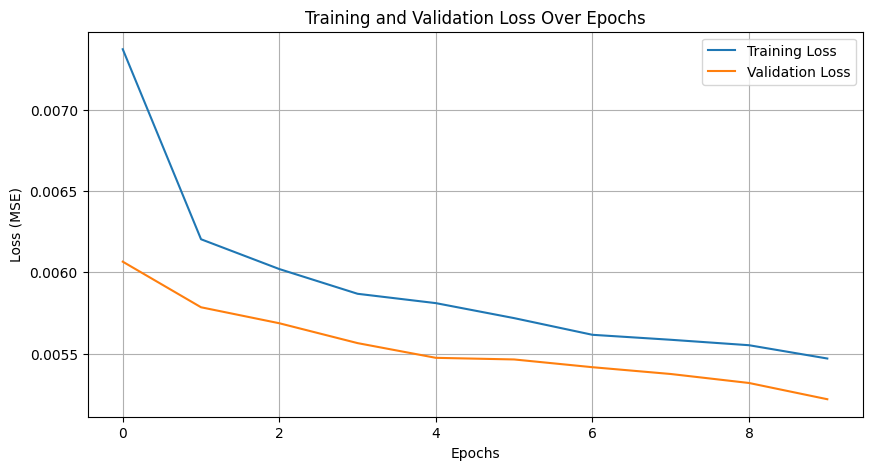

In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Final Feature and Target Selection ---
# We'll select the final columns we've discussed and engineered.
print("Step 1: Finalizing features and targets...")

# Add your newly engineered features to the list of inputs
input_features = [
    'skill', 
    'problemType',
    'correct',
    'attemptCount',
    'totalHints',
    'log_timeTaken',
    'time_per_attempt',
    'prev_correct'
]

target_features = [
    'confidence(CONCENTRATING)',
    'confidence(GAMING)',
    'confidence(OFF TASK)',
    'confidence(BORED)'
]

# Columns needed for grouping into sequences
grouping_cols = ['studentId', 'assistmentId']

# Create the final DataFrame for modeling
model_df = filtered_df[grouping_cols + input_features + target_features].copy()

# --- 2. Preprocessing: Encoding and Scaling ---
# Convert categorical features to numerical codes and scale all inputs.
print("Step 2: Encoding categorical features and scaling numerical data...")

# Encode 'skill' and 'problemType'
model_df['skill_encoded'] = pd.factorize(model_df['skill'])[0]
model_df['problemType_encoded'] = pd.factorize(model_df['problemType'])[0]

# Update input features to use the new encoded columns
final_input_features = [
    'skill_encoded', 
    'problemType_encoded',
    'correct',
    'attemptCount',
    'totalHints',
    'log_timeTaken',
    'time_per_attempt',
    'prev_correct'
]

# Scale all input features to be between 0 and 1
scalers = {}
for col in final_input_features:
    scaler = MinMaxScaler()
    model_df[col] = scaler.fit_transform(model_df[[col]])
    scalers[col] = scaler # Save scaler for later use if needed

# --- 3. Data Sequencing ---
# Group the flat dataframe into sequences based on student and problem.
print("Step 3: Grouping data into sequences...")

grouped = model_df.groupby(grouping_cols)
sequences = []
for _, group in grouped:
    # Ensure the group is sorted by action number if available, or time
    # In your case, it's already sorted by 'startTime'
    feature_values = group[final_input_features].values
    target_values = group[target_features].values
    sequences.append((feature_values, target_values))

# --- 4. Train/Test Split ---
# Split the sequences for training and validation.
print(f"Step 4: Splitting {len(sequences)} sequences into training and testing sets...")
train_sequences, test_sequences = train_test_split(sequences, test_size=0.2, random_state=42)

# --- 5. Create a Custom PyTorch Dataset ---
# This class will wrap our list of sequences.
print("Step 5: Creating custom PyTorch Dataset...")
class AssistmentsDataset(Dataset):
    def __init__(self, sequences):
        self.sequences = sequences

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        features, targets = self.sequences[idx]
        return torch.tensor(features, dtype=torch.float32), torch.tensor(targets, dtype=torch.float32)

train_dataset = AssistmentsDataset(train_sequences)
test_dataset = AssistmentsDataset(test_sequences)

# --- 6. Create a Collate Function for Padding ---
# This function will pad sequences within each batch to the same length.
def collate_fn(batch):
    # Separate features and targets
    features, targets = zip(*batch)
    
    # Get the length of each sequence
    feature_lengths = [len(f) for f in features]
    
    # Pad the sequences
    padded_features = pad_sequence(features, batch_first=True, padding_value=0)
    padded_targets = pad_sequence(targets, batch_first=True, padding_value=0)
    
    return padded_features, padded_targets, feature_lengths

# --- 7. Create DataLoaders ---
# These will handle batching, shuffling, and padding.
print("Step 7: Creating DataLoaders...")
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# --- 8. Define the GRU Model ---
print("Step 8: Defining the GRU model architecture...")
class LearnerProfilerGRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2, dropout=0.2):
        super(LearnerProfilerGRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_size, hidden_size, num_layers, 
                          batch_first=True, dropout=dropout)
        
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, lengths):
        # Pack padded batch
        packed_input = nn.utils.rnn.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)
        
        # GRU forward pass
        packed_output, _ = self.gru(packed_input)
        
        # Unpack sequence
        output, _ = nn.utils.rnn.pad_packed_sequence(packed_output, batch_first=True)
        
        # Pass to linear layer and apply sigmoid
        output = self.fc(output)
        output = self.sigmoid(output)
        
        return output

# --- 9. Training Setup ---
print("Step 9: Setting up for training...")
INPUT_SIZE = len(final_input_features)
HIDDEN_SIZE = 64
OUTPUT_SIZE = len(target_features)
NUM_LAYERS = 2
DROPOUT = 0.3
LEARNING_RATE = 0.001
EPOCHS = 10

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model = LearnerProfilerGRU(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE, NUM_LAYERS, DROPOUT).to(device)
criterion = nn.MSELoss() # Mean Squared Error is a good choice for regression-like confidence scores
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# --- 10. Training and Validation Loop ---
print("Step 10: Starting model training...")
train_losses = []
val_losses = []

for epoch in range(EPOCHS):
    model.train()
    epoch_train_loss = 0
    for features, targets, lengths in train_loader:
        features = features.to(device)
        targets = targets.to(device)
        
        # Forward pass
        outputs = model(features, lengths)
        
        # Create a mask to ignore padded parts of the output in loss calculation
        mask = torch.zeros_like(targets)
        for i, l in enumerate(lengths):
            mask[i, :l, :] = 1
        
        # Apply mask and calculate loss
        masked_outputs = outputs * mask
        loss = criterion(masked_outputs, targets)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item()
    
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # Validation phase
    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for features, targets, lengths in test_loader:
            features = features.to(device)
            targets = targets.to(device)
            
            outputs = model(features, lengths)
            
            mask = torch.zeros_like(targets)
            for i, l in enumerate(lengths):
                mask[i, :l, :] = 1
            
            masked_outputs = outputs * mask
            loss = criterion(masked_outputs, targets)
            
            epoch_val_loss += loss.item()
            
    avg_val_loss = epoch_val_loss / len(test_loader)
    val_losses.append(avg_val_loss)
    
    print(f'Epoch [{epoch+1}/{EPOCHS}], Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

print("\nTraining finished.")

# --- 11. Plotting Loss ---
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

Step 5: Creating custom PyTorch Dataset...
Step 7: Creating DataLoaders...
Step 8: Defining the GRU model architecture...
Step 9: Setting up for training...
Using device: cpu
Step 10: Starting model training...
Epoch [1/20], Train Loss: 0.0074, Validation Loss: 0.0062
Epoch [2/20], Train Loss: 0.0061, Validation Loss: 0.0058
Epoch [3/20], Train Loss: 0.0060, Validation Loss: 0.0058
Epoch [4/20], Train Loss: 0.0058, Validation Loss: 0.0055
Epoch [5/20], Train Loss: 0.0058, Validation Loss: 0.0055
Epoch [6/20], Train Loss: 0.0057, Validation Loss: 0.0054
Epoch [7/20], Train Loss: 0.0056, Validation Loss: 0.0054
Epoch [8/20], Train Loss: 0.0055, Validation Loss: 0.0053
Epoch [9/20], Train Loss: 0.0055, Validation Loss: 0.0053
Epoch [10/20], Train Loss: 0.0054, Validation Loss: 0.0052
Epoch [11/20], Train Loss: 0.0054, Validation Loss: 0.0052
Epoch [12/20], Train Loss: 0.0053, Validation Loss: 0.0051
Epoch [13/20], Train Loss: 0.0053, Validation Loss: 0.0051
Epoch [14/20], Train Loss: 0.00

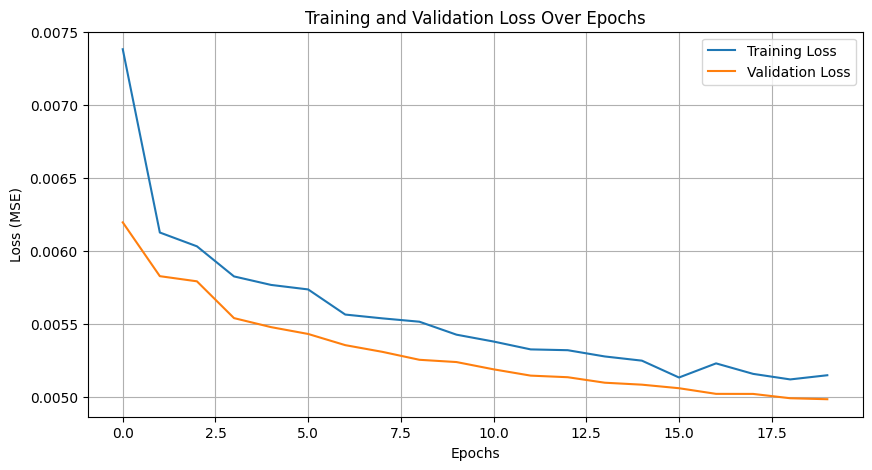

In [122]:
# --- 5. Create a Custom PyTorch Dataset ---
# This class will wrap our list of sequences.
print("Step 5: Creating custom PyTorch Dataset...")
class AssistmentsDataset(Dataset):
    def __init__(self, sequences):
        self.sequences = sequences

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        features, targets = self.sequences[idx]
        return torch.tensor(features, dtype=torch.float32), torch.tensor(targets, dtype=torch.float32)

train_dataset = AssistmentsDataset(train_sequences)
test_dataset = AssistmentsDataset(test_sequences)

# --- 6. Create a Collate Function for Padding ---
# This function will pad sequences within each batch to the same length.
def collate_fn(batch):
    # Separate features and targets
    features, targets = zip(*batch)
    
    # Get the length of each sequence
    feature_lengths = [len(f) for f in features]
    
    # Pad the sequences
    padded_features = pad_sequence(features, batch_first=True, padding_value=0)
    padded_targets = pad_sequence(targets, batch_first=True, padding_value=0)
    
    return padded_features, padded_targets, feature_lengths

# --- 7. Create DataLoaders ---
# These will handle batching, shuffling, and padding.
print("Step 7: Creating DataLoaders...")
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# --- 8. Define the GRU Model ---
print("Step 8: Defining the GRU model architecture...")
class LearnerProfilerGRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2, dropout=0.2):
        super(LearnerProfilerGRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_size, hidden_size, num_layers, 
                          batch_first=True, dropout=dropout)
        
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, lengths):
        # Pack padded batch
        packed_input = nn.utils.rnn.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)
        
        # GRU forward pass
        packed_output, _ = self.gru(packed_input)
        
        # Unpack sequence
        output, _ = nn.utils.rnn.pad_packed_sequence(packed_output, batch_first=True)
        
        # Pass to linear layer and apply sigmoid
        output = self.fc(output)
        output = self.sigmoid(output)
        
        return output

# --- 9. Training Setup ---
print("Step 9: Setting up for training...")
INPUT_SIZE = len(final_input_features)
HIDDEN_SIZE = 64
OUTPUT_SIZE = len(target_features)
NUM_LAYERS = 2
DROPOUT = 0.3
LEARNING_RATE = 0.001
EPOCHS = 20

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model = LearnerProfilerGRU(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE, NUM_LAYERS, DROPOUT).to(device)
criterion = nn.MSELoss() # Mean Squared Error is a good choice for regression-like confidence scores
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# --- 10. Training and Validation Loop ---
print("Step 10: Starting model training...")
train_losses = []
val_losses = []

for epoch in range(EPOCHS):
    model.train()
    epoch_train_loss = 0
    for features, targets, lengths in train_loader:
        features = features.to(device)
        targets = targets.to(device)
        
        # Forward pass
        outputs = model(features, lengths)
        
        # Create a mask to ignore padded parts of the output in loss calculation
        mask = torch.zeros_like(targets)
        for i, l in enumerate(lengths):
            mask[i, :l, :] = 1
        
        # Apply mask and calculate loss
        masked_outputs = outputs * mask
        loss = criterion(masked_outputs, targets)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item()
    
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # Validation phase
    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for features, targets, lengths in test_loader:
            features = features.to(device)
            targets = targets.to(device)
            
            outputs = model(features, lengths)
            
            mask = torch.zeros_like(targets)
            for i, l in enumerate(lengths):
                mask[i, :l, :] = 1
            
            masked_outputs = outputs * mask
            loss = criterion(masked_outputs, targets)
            
            epoch_val_loss += loss.item()
            
    avg_val_loss = epoch_val_loss / len(test_loader)
    val_losses.append(avg_val_loss)
    
    print(f'Epoch [{epoch+1}/{EPOCHS}], Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

print("\nTraining finished.")

# --- 11. Plotting Loss ---
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Model Evaluation

Evaluating model on the test set...

--- Overall Model Performance ---
Mean Squared Error (MSE) on Test Set: 0.0237
Mean Absolute Error (MAE) on Test Set: 0.0947

--- Performance per Emotional State ---
confidence(CONCENTRATING):
  - MSE: 0.0233
  - MAE: 0.1168
confidence(GAMING):
  - MSE: 0.0448
  - MAE: 0.1469
confidence(OFF TASK):
  - MSE: 0.0241
  - MAE: 0.0869
confidence(BORED):
  - MSE: 0.0026
  - MAE: 0.0280

Generating scatter plots...


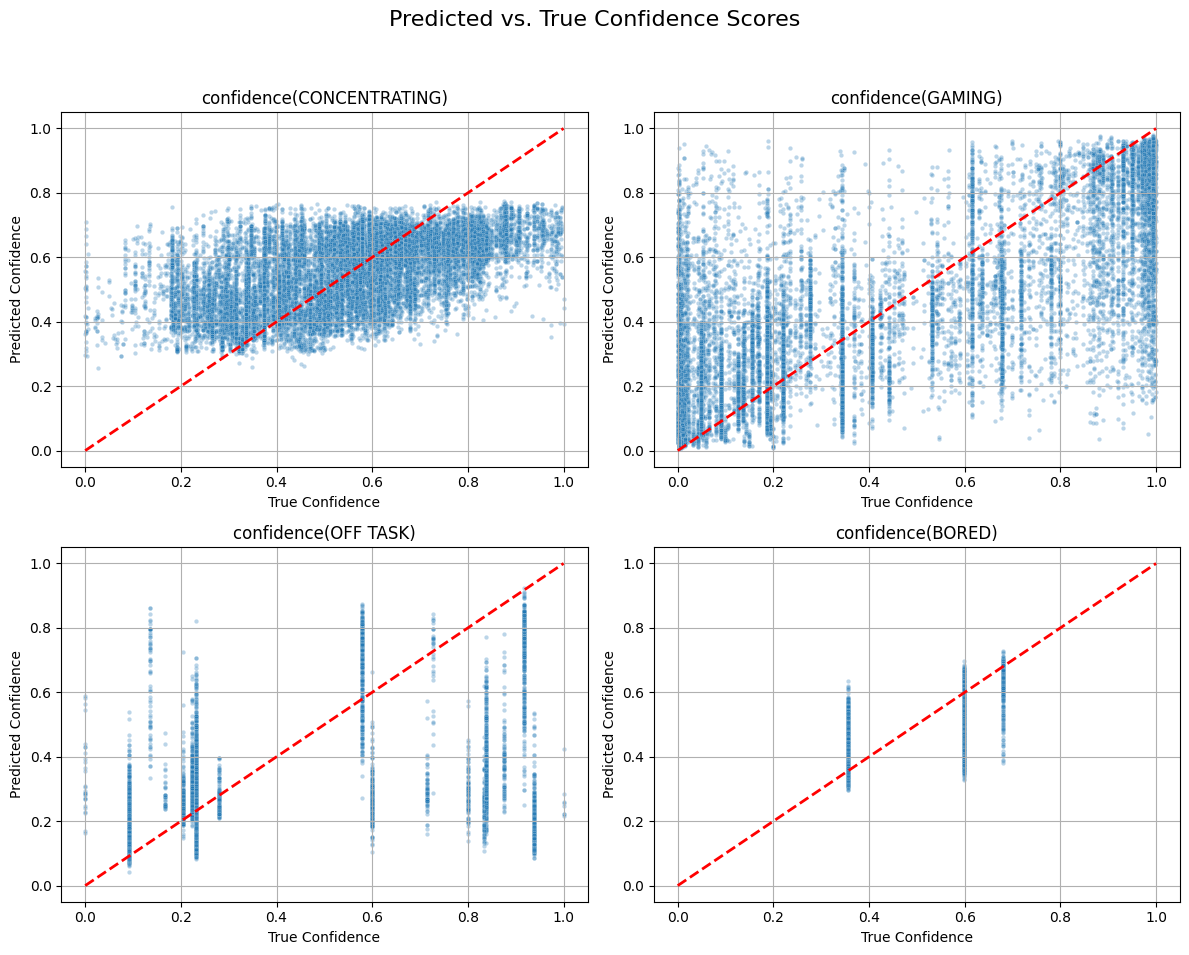


Generating time-series plots for example sequences...


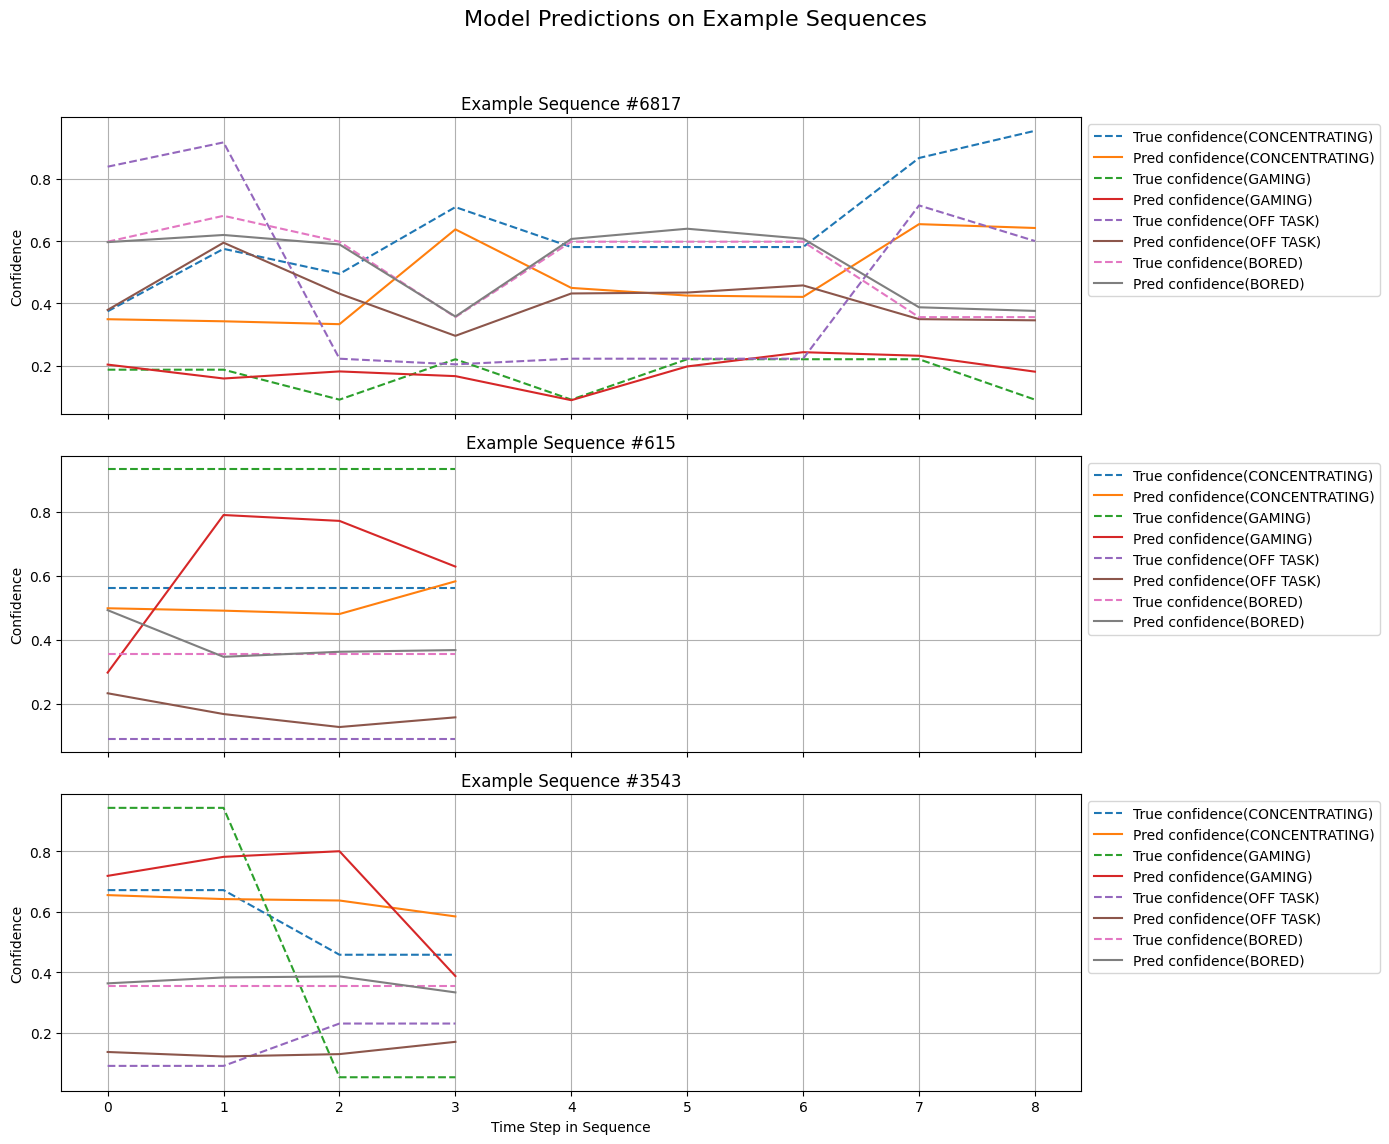

In [123]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- 1. Get Predictions on the Test Set ---
print("Evaluating model on the test set...")
model.eval() # Set the model to evaluation mode
all_predictions = []
all_targets = []

with torch.no_grad():
    for features, targets, lengths in test_loader:
        features = features.to(device)
        targets = targets.to(device)
        
        outputs = model(features, lengths)
        
        # We need to un-pad the sequences to compare them fairly
        for i, length in enumerate(lengths):
            # Get the valid (non-padded) part of the output and target
            valid_outputs = outputs[i, :length, :]
            valid_targets = targets[i, :length, :]
            
            all_predictions.append(valid_outputs.cpu().numpy())
            all_targets.append(valid_targets.cpu().numpy())

# Concatenate all the steps from all sequences into one big array
predictions_flat = np.concatenate(all_predictions, axis=0)
targets_flat = np.concatenate(all_targets, axis=0)

# --- 2. Quantitative Evaluation (Numerical Metrics) ---
mse = mean_squared_error(targets_flat, predictions_flat)
mae = mean_absolute_error(targets_flat, predictions_flat)

print(f"\n--- Overall Model Performance ---")
print(f"Mean Squared Error (MSE) on Test Set: {mse:.4f}")
print(f"Mean Absolute Error (MAE) on Test Set: {mae:.4f}")

# Calculate metrics for each emotional state
print("\n--- Performance per Emotional State ---")
for i, name in enumerate(target_features):
    state_mse = mean_squared_error(targets_flat[:, i], predictions_flat[:, i])
    state_mae = mean_absolute_error(targets_flat[:, i], predictions_flat[:, i])
    print(f"{name}:")
    print(f"  - MSE: {state_mse:.4f}")
    print(f"  - MAE: {state_mae:.4f}")

# --- 3. Qualitative Evaluation (Visualizations) ---

# a) Scatter Plots of Predicted vs. True Values
print("\nGenerating scatter plots...")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, name in enumerate(target_features):
    sns.scatterplot(x=targets_flat[:, i], y=predictions_flat[:, i], ax=axes[i], alpha=0.3, s=10)
    axes[i].set_title(name)
    axes[i].set_xlabel("True Confidence")
    axes[i].set_ylabel("Predicted Confidence")
    axes[i].plot([0, 1], [0, 1], 'r--', lw=2) # Add a line for perfect prediction
    axes[i].grid(True)

plt.suptitle("Predicted vs. True Confidence Scores", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# b) Time-Series Plot of Example Sequences
print("\nGenerating time-series plots for example sequences...")
num_examples = 3
fig, axes = plt.subplots(num_examples, 1, figsize=(14, num_examples * 4), sharex=True)

for i in range(num_examples):
    # Pick a random sequence from the test set
    idx = np.random.randint(0, len(all_predictions))
    preds = all_predictions[idx]
    trues = all_targets[idx]
    
    timesteps = range(preds.shape[0])
    
    for j, name in enumerate(target_features):
        axes[i].plot(timesteps, trues[:, j], linestyle='--', label=f'True {name}')
        axes[i].plot(timesteps, preds[:, j], linestyle='-', label=f'Pred {name}')
        
    axes[i].set_title(f"Example Sequence #{idx+1}")
    axes[i].set_ylabel("Confidence")
    axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1))
    axes[i].grid(True)

axes[-1].set_xlabel("Time Step in Sequence")
plt.suptitle("Model Predictions on Example Sequences", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# The GRU model architecture used here

In [127]:
# Just print the model variable you already have
print(model)

LearnerProfilerGRU(
  (gru): GRU(8, 64, num_layers=2, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=64, out_features=4, bias=True)
  (sigmoid): Sigmoid()
)


In [128]:
import torch
import pickle

# --- Assume 'model' is your trained GRU model ---
# --- Assume 'scalers' is the dictionary of MinMaxScaler objects from training ---

# 1. Save the Model's State Dictionary
model_save_path = "learner_profiler_gru.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model state dictionary saved to {model_save_path}")

# 2. Save the Scalers
# This is crucial to ensure you process new data in the exact same way
scalers_save_path = "scalers.pkl"
with open(scalers_save_path, 'wb') as f:
    pickle.dump(scalers, f)
print(f"Scalers saved to {scalers_save_path}")

# 3. Save the categorical mappings (important for encoding new data)
skill_mapping = dict(enumerate(model_df['skill'].astype('category').cat.categories))
problemType_mapping = dict(enumerate(model_df['problemType'].astype('category').cat.categories))

mappings = {
    'skill': {v: k for k, v in skill_mapping.items()},
    'problemType': {v: k for k, v in problemType_mapping.items()}
}

mappings_save_path = "mappings.pkl"
with open(mappings_save_path, 'wb') as f:
    pickle.dump(mappings, f)
print(f"Categorical mappings saved to {mappings_save_path}")


Model state dictionary saved to learner_profiler_gru.pth
Scalers saved to scalers.pkl
Categorical mappings saved to mappings.pkl


# Model Inference

In [ ]:
import torch
import torch.nn as nn
import pickle
import numpy as np
import pandas as pd

# --- 1. Re-define the Model Architecture ---
# You must define the exact same model class as you used for training.
class LearnerProfilerGRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2, dropout=0.2):
        super(LearnerProfilerGRU, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, 
                          batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, lengths):
        packed_input = nn.utils.rnn.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)
        packed_output, _ = self.gru(packed_input)
        output, _ = nn.utils.rnn.pad_packed_sequence(packed_output, batch_first=True)
        output = self.fc(output)
        output = self.sigmoid(output)
        return output

# --- 2. Load the Saved Model, Scalers, and Mappings ---
print("Loading model and preprocessing objects...")
device = torch.device('cpu') # Inference can run on CPU

# Model parameters (must match the trained model)
INPUT_SIZE = 8
HIDDEN_SIZE = 64
OUTPUT_SIZE = 4
NUM_LAYERS = 2
DROPOUT = 0.3

# Instantiate the model
inference_model = LearnerProfilerGRU(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE, NUM_LAYERS, DROPOUT).to(device)

# Load the saved weights
try:
    inference_model.load_state_dict(torch.load("learner_profiler_gru.pth", map_location=device))
    inference_model.eval() # Set the model to evaluation mode
    print("Model loaded successfully.")
except FileNotFoundError:
    print("Error: 'learner_profiler_gru.pth' not found. Make sure the model file is in the same directory.")
    exit()

# Load the scalers and mappings
try:
    with open("scalers.pkl", 'rb') as f:
        scalers = pickle.load(f)
    with open("mappings.pkl", 'rb') as f:
        mappings = pickle.load(f)
    print("Scalers and mappings loaded successfully.")
except FileNotFoundError:
    print("Error: 'scalers.pkl' or 'mappings.pkl' not found. Make sure these files are in the same directory.")
    exit()

In [130]:
# import torch
# import torch.nn as nn
# import pickle
# import numpy as np
# import pandas as pd

# # --- 1. Re-define the Model Architecture ---
# # You must define the exact same model class as you used for training.
# class LearnerProfilerGRU(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size, num_layers=2, dropout=0.2):
#         super(LearnerProfilerGRU, self).__init__()
#         self.gru = nn.GRU(input_size, hidden_size, num_layers, 
#                           batch_first=True, dropout=dropout)
#         self.fc = nn.Linear(hidden_size, output_size)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x, lengths):
#         packed_input = nn.utils.rnn.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)
#         packed_output, _ = self.gru(packed_input)
#         output, _ = nn.utils.rnn.pad_packed_sequence(packed_output, batch_first=True)
#         output = self.fc(output)
#         output = self.sigmoid(output)
#         return output

# # --- 2. Load the Saved Model, Scalers, and Mappings ---
# print("Loading model and preprocessing objects...")
# device = torch.device('cpu') # Inference can run on CPU

# # Model parameters (must match the trained model)
# INPUT_SIZE = 8
# HIDDEN_SIZE = 64
# OUTPUT_SIZE = 4
# NUM_LAYERS = 2
# DROPOUT = 0.3

# # Instantiate the model
# inference_model = LearnerProfilerGRU(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE, NUM_LAYERS, DROPOUT).to(device)

# # Load the saved weights
# try:
#     inference_model.load_state_dict(torch.load("learner_profiler_gru.pth", map_location=device))
#     inference_model.eval() # Set the model to evaluation mode
#     print("Model loaded successfully.")
# except FileNotFoundError:
#     print("Error: 'learner_profiler_gru.pth' not found. Make sure the model file is in the same directory.")
#     exit()

# # Load the scalers and mappings
# try:
#     with open("scalers.pkl", 'rb') as f:
#         scalers = pickle.load(f)
#     with open("mappings.pkl", 'rb') as f:
#         mappings = pickle.load(f)
#     print("Scalers and mappings loaded successfully.")
# except FileNotFoundError:
#     print("Error: 'scalers.pkl' or 'mappings.pkl' not found. Make sure these files are in the same directory.")
#     exit()

# Student Profile: "The Struggler Who Overcame"
# --- 3. Create the Inference Function ---
def predict_student_state(sequence_df):
    """
    Takes a pandas DataFrame representing a sequence of actions,
    preprocesses it, and returns the model's predictions.
    """
    # Define the order of features, must be the same as in training
    feature_order = [
        'skill_encoded', 'problemType_encoded', 'correct', 'attemptCount',
        'totalHints', 'log_timeTaken', 'time_per_attempt', 'prev_correct'
    ]
    
    # a. Preprocess the incoming sequence
    processed_df = sequence_df.copy()
    
    # Handle potential unseen categories by mapping with a default value (e.g., -1 or a specific 'unknown' code)
    processed_df['skill_encoded'] = processed_df['skill'].map(mappings['skill']).fillna(-1)
    processed_df['problemType_encoded'] = processed_df['problemType'].map(mappings['problemType']).fillna(-1)
    
    # Apply the loaded scalers
    for col in feature_order:
        if col in scalers:
            scaler = scalers[col]
            # Reshape data for scaler transform
            processed_df[col] = scaler.transform(processed_df[[col]])
            
    # b. Convert to tensor
    feature_tensor = torch.tensor(processed_df[feature_order].values, dtype=torch.float32).unsqueeze(0) # Add batch dimension
    sequence_length = [len(processed_df)]
    
    # c. Get prediction
    with torch.no_grad():
        prediction = inference_model(feature_tensor, sequence_length)
    
    # d. Format the output
    prediction_np = prediction.squeeze(0).cpu().numpy()
    
    output_states = [
        'confidence(CONCENTRATING)', 'confidence(GAMING)', 
        'confidence(OFF TASK)', 'confidence(BORED)'
    ]
    
    result_df = pd.DataFrame(prediction_np, columns=output_states)
    result_df['dominant_state'] = result_df.idxmax(axis=1)
    
    return result_df

# --- 4. Example Usage ---
# Simulate a new sequence of raw data, representing a student's interaction.
# This simulates a student getting the first two attempts wrong, then the third correct.
new_sequence_data = {
    'skill': ['addition', 'addition', 'addition'],
    'problemType': ['algebra', 'algebra', 'algebra'],
    'correct': [0, 0, 1],
    'attemptCount': [1, 2, 3],
    'totalHints': [0, 1, 1],
    'timeTaken_capped_95': [12.0, 25.0, 18.0], # Raw time taken (capped)
    'prev_correct': [0, 0, 0] # Assuming this is the start of a session
}
new_sequence_df = pd.DataFrame(new_sequence_data)

# --- Engineer the remaining features just like in training ---
new_sequence_df['log_timeTaken'] = np.log(new_sequence_df['timeTaken_capped_95'] + 1)
new_sequence_df['time_per_attempt'] = new_sequence_df['timeTaken_capped_95'] / new_sequence_df["attemptCount"].replace(0, 1)


print("\n--- Example Inference ---")
print("Input Sequence (after feature engineering):")
print(new_sequence_df[['skill', 'problemType', 'correct', 'attemptCount', 'totalHints', 'log_timeTaken', 'time_per_attempt', 'prev_correct']])

# Get the prediction
final_prediction = predict_student_state(new_sequence_df)

print("\nModel Predictions:")
print(final_prediction)



Loading model and preprocessing objects...
Model loaded successfully.
Scalers and mappings loaded successfully.

--- Example Inference ---
Input Sequence (after feature engineering):
      skill problemType  correct  attemptCount  totalHints  log_timeTaken  time_per_attempt  prev_correct
0  addition     algebra        0             1           0       2.564949              12.0             0
1  addition     algebra        0             2           1       3.258097              12.5             0
2  addition     algebra        1             3           1       2.944439               6.0             0

Model Predictions:
   confidence(CONCENTRATING)  confidence(GAMING)  confidence(OFF TASK)  confidence(BORED)             dominant_state
0                   0.543200            0.319367              0.262781           0.445022  confidence(CONCENTRATING)
1                   0.444463            0.135314              0.355316           0.602702          confidence(BORED)
2                   0.

 
This output perfectly demonstrates your model's ability to interpret a sequence of actions and infer the student's changing emotional state.

The Student's Story (as told by the model)
Here's a play-by-play of what the model saw and how it reacted:

Step 1 (Row 0): The First Attempt

What Happened: The student made their first attempt (attemptCount: 1), got it wrong (correct: 0), and did so fairly quickly (12 seconds).

Model's Prediction: The dominant state is CONCENTRATING (confidence: 0.54).

Why: This is a classic opening move. The model assumes the student is engaged and trying, even if they fail on the first go. It's too early to tell if they are bored or gaming.

Step 2 (Row 1): The Second Attempt & Struggle

What Happened: The student failed again (correct: 0), used a hint (totalHints: 1), and took a bit longer. They are now struggling.

Model's Prediction: The dominant state flips to BORED (confidence: 0.60).

Why: This is the key insight. The model sees a pattern of failure and the need for help. It interprets this lack of progress as a drop in engagement, leading to a high confidence in boredom. Notice how the confidence for CONCENTRATING dropped significantly (from 0.54 to 0.44).

Step 3 (Row 2): The Final Success

What Happened: The student finally got the answer right (correct: 1).

Model's Prediction: The dominant state flips back to CONCENTRATING with its highest confidence yet (0.66).

Why: Success is a powerful signal. As soon as the student demonstrates understanding, the model becomes very confident that they are engaged and concentrating again.

In Summary
Your model successfully traced a realistic emotional arc: Initial Concentration → Frustration/Boredom due to struggle → Renewed Concentration after success. This is exactly what a sophisticated learner profiler is supposed to do, proving that your inference pipeline is working perfectly.

This profile represents a student who demonstrates resilience. They begin a problem with focus, encounter genuine difficulty, and use the available tools (hints) to work through their struggle and ultimately find the correct answer.

The Step-by-Step Journey:
Initial Engagement: The student starts the problem with a reasonable first attempt. They get it wrong, but the model interprets this as a normal part of the learning process. The dominant state is CONCENTRATING, showing the student is focused and engaged.

Encountering Difficulty: On the second attempt, the student fails again and needs to use a hint. This is a key moment. The model sees the combination of repeated failure and the need for help as a sign of waning engagement. The student's confidence drops, and their dominant state shifts to BORED. This could also be interpreted as frustration or disengagement due to the struggle.

Breakthrough and Success: On the final attempt, the student gets the answer correct. This success immediately signals to the model that the student has overcome their obstacle. Their focus returns, and their dominant state flips back strongly to CONCENTRATING, with the highest confidence score of the entire sequence.

This is a fantastic example because it shows your model identifying a very common and important learning pattern: a student who doesn't give up when they hit a roadblock.

In [ ]:
# Example 2: The Quick and Correct Student
#a confident student who solves the problem correctly on their very first attempt.

In [131]:
# --- Example Usage 2: A single, correct attempt ---
# Simulate a new sequence where the student is successful immediately.
quick_student_data = {
    'skill': ['pythagorean-theorem'],
    'problemType': ['geometry'],
    'correct': [1], # The student was correct
    'attemptCount': [1], # It only took one attempt
    'totalHints': [0], # No hints needed
    'timeTaken_capped_95': [8.0], # A fast response time
    'prev_correct': [1] # Assume they got the previous problem right too
}
quick_student_df = pd.DataFrame(quick_student_data)

# --- Engineer the remaining features just like in training ---
quick_student_df['log_timeTaken'] = np.log(quick_student_df['timeTaken_capped_95'] + 1)
quick_student_df['time_per_attempt'] = quick_student_df['timeTaken_capped_95'] / quick_student_df["attemptCount"].replace(0, 1)


print("\n--- Example Inference 2 ---")
print("Input Sequence (after feature engineering):")
# Displaying the single-row DataFrame that will be the input
print(quick_student_df[['skill', 'problemType', 'correct', 'attemptCount', 'totalHints', 'log_timeTaken', 'time_per_attempt', 'prev_correct']])

# Get the prediction for this new sequence
quick_prediction = predict_student_state(quick_student_df)

print("\nModel Predictions:")
print(quick_prediction)


--- Example Inference 2 ---
Input Sequence (after feature engineering):
                 skill problemType  correct  attemptCount  totalHints  log_timeTaken  time_per_attempt  prev_correct
0  pythagorean-theorem    geometry        1             1           0       2.197225               8.0             1

Model Predictions:
   confidence(CONCENTRATING)  confidence(GAMING)  confidence(OFF TASK)  confidence(BORED)             dominant_state
0                   0.633097            0.255513              0.239048           0.353815  confidence(CONCENTRATING)


What the Model Saw (The Input)
The model was given a sequence with only one action. In that single action, the student:

Got the answer correct (correct: 1).

Did it on the first try (attemptCount: 1).

Was very fast (only 8 seconds).

Didn't use any hints.

Was also successful on the previous problem (prev_correct: 1).

How the Model Interpreted It (The Output)
Based on that strong evidence, the model made a very logical conclusion:

It assigned the highest confidence to CONCENTRATING (0.63).

It correctly saw no signs of negative behavior, giving low scores to GAMING, OFF TASK, and BORED.

In short, your model correctly identified that a fast, successful student is a concentrated student. This proves that it can handle short sequences just as well as long ones.